In [43]:
import pandas as pd 
from rdflib import Graph, Literal, RDF, URIRef, Namespace 
from rdflib.namespace import FOAF, XSD 
import urllib.parse


In [37]:
!pip install pydotplus
!pip install graphviz


In [44]:
df = pd.read_csv("prod.csv")
df

,Product id,Product Name,RAM,SSD,Price,Processor,ScreenSize
0,1,Acer Aspire,4,256,31000,i5,15.5
1,2,Macbook,8,128,87000,i3,13.3
2,3,Lenevo notebook,8,512,47000,Ryzen-3,14.0
3,4,Acer Notebook,16,256,35000,i3,15.5
4,5,Acer NItro,16,256,87000,i7,17.0
5,6,HP,8,512,40000,Ryzen-3,14.0
6,7,HP Chromebook,8,64,21000,Dual Core,11.0
7,8,Asus Vivobook,4,256,27999,i3,15.5
8,9,Asus Chromebook,8,64,21000,Dual Core,11.0
9,10,Dell,4,512,59000,i5,15.3


In [45]:
g = Graph()
schema = Namespace('http://schema.org/')
prod = Namespace("https://example.org/product/")
foaf = Namespace("http://xmlns.com/foaf/0.1/")


In [24]:
foaf


Namespace('http://xmlns.com/foaf/0.1/')

In [46]:
# for index, row in df.iterrows():
#     g.add((URIRef(prod+row['Product Name']), RDF.type, FOAF.name))
#     g.add((URIRef(prod+row['Product Name']), URIRef(schema+'name'), Literal(row['Product Name'] ,datatype=XSD.string)) )
#     g.add((URIRef(prod+row['Product Name']), RDF.type, URIRef(foaf+"id")))
#     g.add((URIRef(prod+row['Product Name']), URIRef(schema+"id"), Literal(row['Product id'],datatype=XSD.integer) ))
#     g.add((URIRef(prod+row['Product Name']), URIRef(schema+"hasRam"),Literal(row['RAM (in GB)'], datatype=XSD.integer)))
#     g.add((URIRef(prod+row['Product Name']), URIRef(schema+"hasSSD"),Literal(row['SSD (in GB)'], datatype=XSD.integer)))


for index, row in df.iterrows():
    g.add((URIRef(prod+str(row['Product id'])), RDF.type, URIRef(foaf+"id")))

    g.add((URIRef(prod+str(row['Product id'])), URIRef(schema+'id'), Literal(row['Product id'], datatype=XSD.int)))

    g.add((URIRef(prod+str(row['Product id'])), URIRef(schema+'name'), Literal(row['Product Name'], datatype=XSD.string)))

    g.add((URIRef(prod+str(row['Product id'])), URIRef(schema+"hasRam"), Literal(row['RAM'], datatype=XSD.integer)))

    g.add((URIRef(prod+str(row['Product id'])), URIRef(schema+"hasSSD"), Literal(row['SSD'], datatype=XSD.integer)))

    g.add((URIRef(prod+str(row['Product id'])), URIRef(schema+"hasPrice"), Literal(row['Price'], datatype=XSD.integer)))

    g.add((URIRef(prod+str(row['Product id'])), URIRef(schema+"hasProcessor"), Literal(row['Processor'], datatype=XSD.string)))

    g.add((URIRef(prod+str(row['Product id'])), URIRef(schema+"hasScreenSize"), Literal(row['ScreenSize'], datatype=XSD.string)))
   


In [47]:
from rdflib.tools.rdf2dot import rdf2dot
from IPython.display import display, Image
import pydotplus
import io



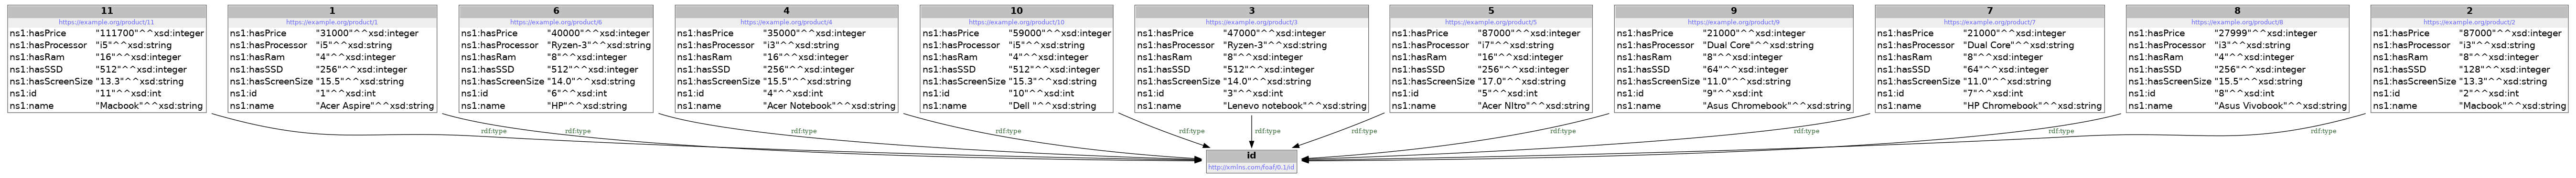

In [48]:
def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts={display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png))


visualize(g)


In [32]:
g.serialize('mycsv2rdf.ttl', format='turtle')


<Graph identifier=N62fcaea30f1c47baa3f38308ebd0a6e7 (<class 'rdflib.graph.Graph'>)>